#Lab 3: Bayesian Estimation
By
  - Fahd B - EE24B016
  - Venkatakrishnan Asuri - EP23B031

##A. Titanic Survival

In [ ]:
# Imports
import seaborn as sns
import pprint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [ ]:
# Data read
df = sns.load_dataset('titanic')
filtered_df = df[df['adult_male'] & (df['pclass'] == 3)]
sample_df = filtered_df.head(50)

In [ ]:
# Setting up priors
alpha1 = 5
beta1 = 5
alpha2 = 2
beta2 = 20
alpha3 = 1
beta3 = 1

priors = [[alpha1, beta1], [alpha2, beta2], [alpha3, beta3]]
labels = ['Prior 1: Random', 'Prior 2: Informed', 'Prior 3: Uninformed']
param_list = priors.copy()
pprint.pp(param_list)

[[5, 5], [2, 20], [1, 1]]


In [ ]:
# Reading data
true_survival_rate = filtered_df['survived'].mean()

survivors = len(sample_df[sample_df['survived'] == 1])
deaths = len(sample_df[sample_df['survived'] == 0])

print("Survivors: " , survivors, "\t Deaths: ", deaths, "\t Total:", survivors + deaths)

Survivors:  6 	 Deaths:  44 	 Total: 50


In [ ]:
# Updating Parameters
# α_post = α  + survivor
# β_post = beta + deaths

means = []
for i in range(len(param_list)):
  param_list[i][0] = priors[i][0] + survivors # alpha
  param_list[i][1] = priors[i][1] + deaths # beta
  means.append(param_list[i][0] / (param_list[i][0] + param_list[i][1])) # mean

print("Estimated Parameters: [alpha, beta" )
pprint.pp(param_list)


print()
print("Means: " )
pprint.pp(means)


print()
print(f'True Mean: {true_survival_rate:.3f}')

Estimated Parameters: [alpha, beta
[[11, 49], [8, 64], [7, 45]]

Means: 
[0.18333333333333332, 0.1111111111111111, 0.1346153846153846]

True Mean: 0.119


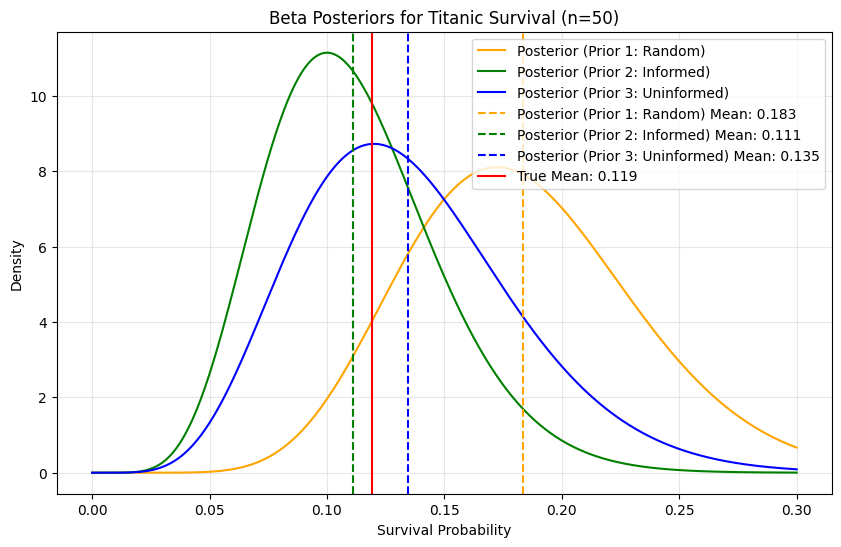

In [ ]:
#Plotting
x = np.linspace(0,0.3, 500)
plt.figure(figsize=(10,6))

colors = ['orange', 'green', 'blue']
for [a_p, b_p], label, color in zip(param_list, labels, colors):
    y = beta.pdf(x, a_p, b_p)
    plt.plot(x, y, label=f'Posterior ({label})', color=color)

for m, label, color in zip(means, labels, colors):
    plt.axvline(m,color=color, linestyle='--', label=f'Posterior ({label}) Mean: {m:.3f}')


plt.axvline(true_survival_rate, color='red', linestyle='-', label=f'True Mean: {true_survival_rate:.3f}')
plt.title('Beta Posteriors for Titanic Survival (n=50)')
plt.xlabel('Survival Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **Inference:**
The Beta posteriors are asymmetrical because α is not equal to β.

The distribution peak (mode) represents the most frequent value in our n=50 sample.

Since the true survivor rate is taken as the mean of the whole sample. It is better to compare the mean of each posterior distribution with the true survivor rate, rather than comparing it with the peaks.

From this, we could say that our informed prior with estimated probability as 1.11 is close to the true average.

##B. The Speed of Light (Normal - Normal Model)

In [ ]:
# Import
from scipy.stats import norm
import pandas as pd

In [ ]:
# Loading tue data
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/morley.csv"
df_michelson = pd.read_csv(url)
data = df_michelson['Speed'].values

In [ ]:
data

array([ 850,  740,  900, 1070,  930,  850,  950,  980,  980,  880, 1000,
        980,  930,  650,  760,  810, 1000, 1000,  960,  960,  960,  940,
        960,  940,  880,  800,  850,  880,  900,  840,  830,  790,  810,
        880,  880,  830,  800,  790,  760,  800,  880,  880,  880,  860,
        720,  720,  620,  860,  970,  950,  880,  910,  850,  870,  840,
        840,  850,  840,  840,  840,  890,  810,  810,  820,  800,  770,
        760,  740,  750,  760,  910,  920,  890,  860,  880,  720,  840,
        850,  850,  780,  890,  840,  780,  810,  760,  810,  790,  810,
        820,  850,  870,  870,  810,  740,  810,  940,  950,  800,  810,
        870])

In [ ]:
# Priors
mu_0 = 700
sigma_0 = 50
sigma_noise = 100
true_val = 792.458

In [ ]:
def posterior(n, obs, m0, s0, sn):
  if n==0: return m0, s0

  current_data = obs[:n]
  x_bar = np.mean(current_data)

  # Updating parameters
  prec_prior = 1 / s0**2
  prec_data = n / sn**2

  prec_post = prec_prior + prec_data
  var_post = 1 / prec_post

  m_post = (m0 * prec_prior + x_bar * prec_data) / prec_post # Basically weighted average of prec_prior, prec_post
  return m_post, np.sqrt(var_post)


Prior: Mean = 700.00, SD= 50.00
n=5: Mean = 810.00, SD= 33.33
n=100: Mean = 846.54, SD= 9.81


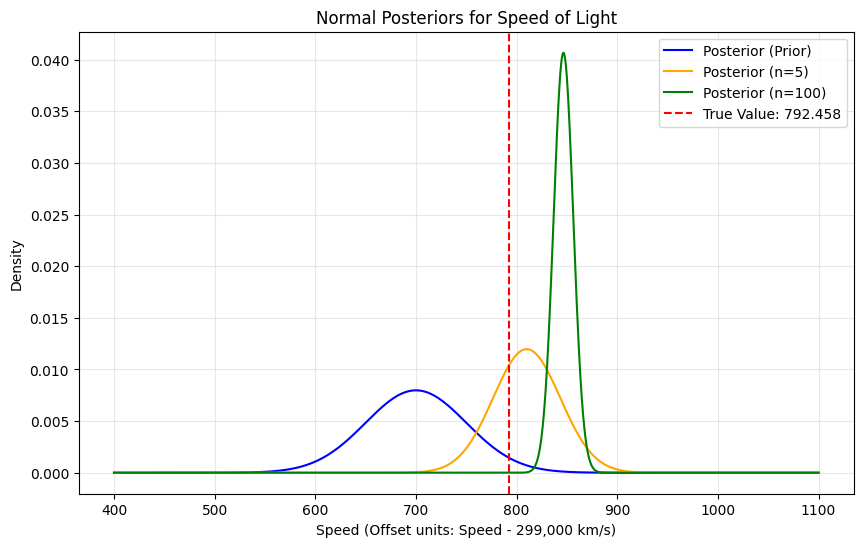

In [ ]:
# Plotting
x = np.linspace(400, 1100, 1000)
plt.figure(figsize=(10,6))

stages = [(0, 'Prior'), (5, 'n=5'), (100, 'n=100')]
colors = ['blue', 'orange' , 'green']

for (n,label), color in zip(stages, colors):
  m_post, s_post = posterior(n, data, mu_0, sigma_0, sigma_noise)
  y = norm.pdf(x, m_post, s_post)

  plt.plot(x,y, label=f'Posterior ({label})', color=color)
  # plt.axvline(m_post, color=color, linestyle='--', label=f'Posterior Mean: ({label})')

  print(f"{label}: Mean = {m_post:.2f}, SD= {s_post:.2f}")

plt.axvline(true_val, color='red', linestyle='--', label=f'True Value: {true_val}')
plt.title('Normal Posteriors for Speed of Light')
plt.xlabel('Speed (Offset units: Speed - 299,000 km/s)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **Inference:**

As the no of data increases, the distribution of data dominates the prior. We could see that the distribution shifts to the sample mean as n is increased.

The distribution of speed of light according to Michelson experiment seems to be inacccurate with a shift of 46.54 units ahead, but is precise with SD= 9.81.

High precision in experiment tells that the inaccuracy might be due to some **systemic bias** in the experiment setup.

### **Effect of each parameters:**

**μ0​ (Prior Mean):** If started higher, the entire curve shifts right.

**σ0​ (Prior SD):**  If increased, the model trusts the data more, because of uncertain prior.

**σ (Likelihood SD):** Increase in this means noisier equipment. The model trusts the prior more. It takes more data to shift the mean.

**n (Sample Size):** There is more data, the curve becomes more precise, and centres on mean of data.

#**In Class Component**

##2. Titanic Survival

In [ ]:
## 2.1 Monte Carlo Sample
import numpy as np

In [ ]:
def get_likelihood(k, n, p_space):
  ln_likelihood = k * np.log(p_space) +  (n-k) * np.log(1 - p_space)
  return np.exp(ln_likelihood)

def get_posterior(likelihood):
  s = np.sum(likelihood)
  return likelihood / s

def posterior_mean(w, p):
  return np.sum(w * p)

In [ ]:
def monte_carlo(k, n, p_space, prior_func):
 theta_samples = np.random.uniform(0, 1, N)
 l =  get_likelihood(k, n , p_space)
 w = get_posterior(l)
 prior = prior_func(p_space)
 w = w *p
 mean = posterior_mean(w, p_space)# Plotting


 counts, bin_edges = np.histogram(p_space, bins=100, weights=w, density=True)
 centers = (bin_edges[:-1] + bin_edges[1:]) / 2

 return centers, counts, mean



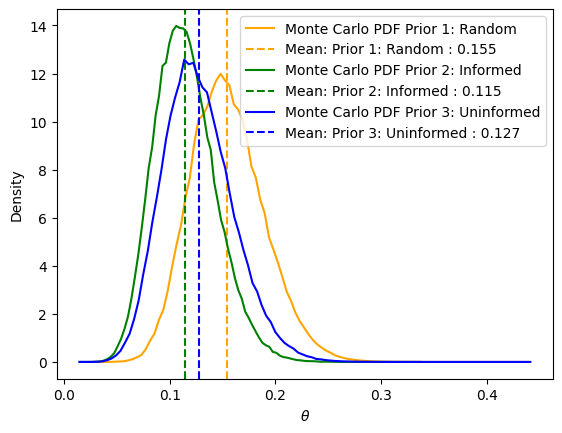

In [ ]:
N = 100000

for [alpha, beta], label, color in zip(priors, labels, colors):
  p = np.random.beta(alpha, beta, N)
  centers, counts, mean = monte_carlo(survivors, survivors + deaths, p, lambda x: 1)
  plt.plot(centers, counts, label=f'Monte Carlo PDF {label}', color=color)

  plt.axvline(mean, color=color, linestyle='--', label=f'Mean: {label} : {mean:.3f}')


plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.legend()
plt.show()

Part 2: |sin| Posterior Mean: 0.1496
Part 3: |cos| Posterior Mean: 0.1312
Part 4: Quadratic Posterior Mean: 0.1669


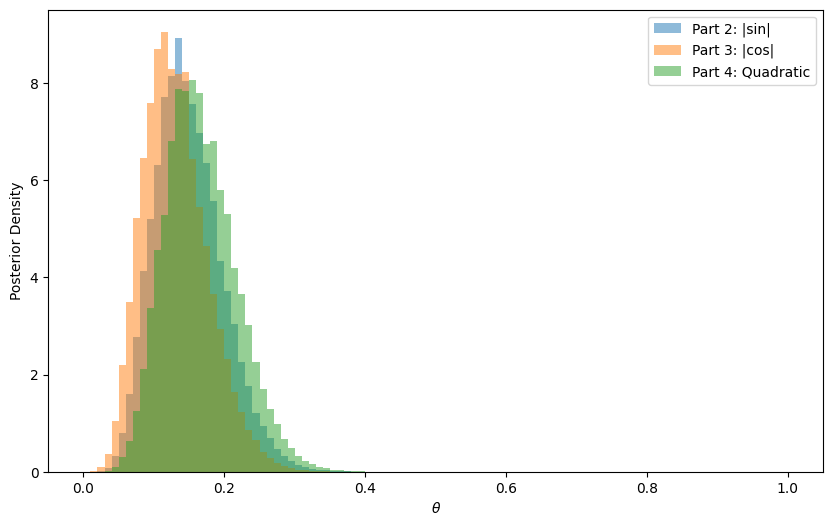

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian(k, n, prior_func, label):
    N = 100000
    theta_samples = np.random.uniform(0, 1, N)

    log_prior = np.log(prior_func(theta_samples) + 1e-12) # Add small epsilon
    log_likelihood = k * np.log(theta_samples + 1e-12) + (n - k) * np.log(1 - theta_samples + 1e-12)

    log_posterior = log_prior + log_likelihood # Prior * Likelihood

    max_log = np.max(log_posterior)
    weights = np.exp(log_posterior - max_log)
    weights /= np.sum(weights)

    post_mean = np.sum(theta_samples * weights)
    print(f"{label} Posterior Mean: {post_mean:.4f}")

    plt.hist(theta_samples, bins=100, weights=weights, density=True, alpha=0.5, label=label)
    return post_mean

p2_prior = lambda t: np.abs(np.sin(np.pi * t)) #
p3_prior = lambda t: np.abs(np.cos(np.pi * t)) #
p4_prior = lambda t: t**2

plt.figure(figsize=(10, 6))
n = survivors + deaths
bayesian(survivors, n, p2_prior, "Part 2: |sin|")
bayesian(survivors, n, p3_prior, "Part 3: |cos|")
bayesian(survivors, n, p4_prior, "Part 4: Quadratic")
plt.xlabel(r'$\theta$')
plt.ylabel('Posterior Density')
plt.legend()
plt.show()

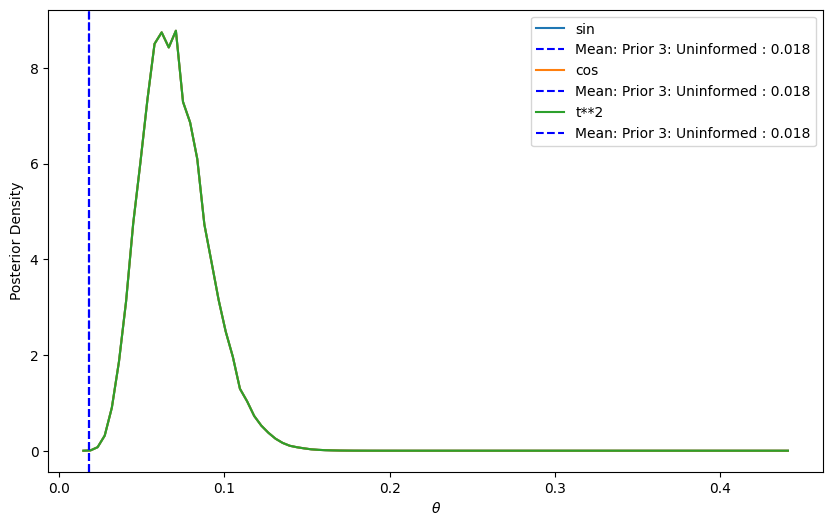

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


p2_prior = lambda t: np.abs(np.sin(np.pi * t)) #
p3_prior = lambda t: np.abs(np.cos(np.pi * t)) #
p4_prior = lambda t: t**2

theta_samples = np.random.uniform(0, 1, N)


plt.figure(figsize=(10, 6))
n = survivors + deaths
centres, counts, mean = monte_carlo(survivors, n, theta_samples, p2_prior)
plt.plot(centers, counts, label=f'sin')
plt.axvline(mean, color=color, linestyle='--', label=f'Mean: {label} : {mean:.3f}')

centres, counts, mean = monte_carlo(survivors, n, theta_samples, p3_prior)
plt.plot(centers, counts, label=f'cos')
plt.axvline(mean, color=color, linestyle='--', label=f'Mean: {label} : {mean:.3f}')

centres, counts, mean = monte_carlo(survivors, n, theta_samples, p4_prior)
plt.plot(centers, counts, label=f't**2')
plt.axvline(mean, color=color, linestyle='--', label=f'Mean: {label} : {mean:.3f}')



plt.xlabel(r'$\theta$')
plt.ylabel('Posterior Density')
plt.legend()